**STAT 557: DATA MINING - I**

---
**Assignment - 2**


Author: Aadya Sanwal [AFS6594@PSU.EDU] and Denesh Kumar [DZM5964@PSU.EDU]


--------------------------------------------------------------------------

In [ ]:
# Libraries 

In [38]:
import time
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.metrics import roc_curve, auc

In [39]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [40]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Import Credit Card Data 

In [7]:
data_credit_card = pd.read_csv("UCI_Credit_Card.csv")

In [8]:
data_credit_card.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
# Dimension of the dataset, we have 24 Features and 30000 data points 

In [9]:
data_credit_card.shape

(30000, 25)

In [8]:
# Check for Null or missing values in dataset, and we do not have any Null points 

In [10]:
data_credit_card.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [ ]:
# Splitting Feature and the Prediction variable from dataset as x and y respectively 

In [12]:
x = data_credit_card.drop('default.payment.next.month', axis=1)
y = data_credit_card['default.payment.next.month']

In [ ]:
##Exploratory Data Analysis

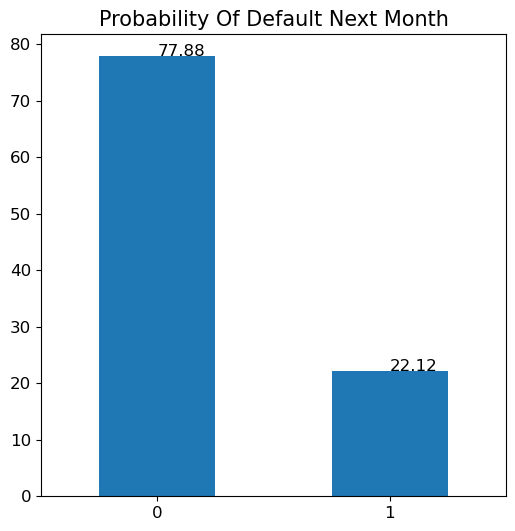

In [47]:
data_credit_card.rename(columns={'default.payment.next.month':'def_pay'}, inplace=True)
def_cnt = round((data_credit_card.def_pay.value_counts(normalize=True)*100),3)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Default Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

In [49]:
data_credit_card['def_pay'].value_counts()

0    23364
1     6636
Name: def_pay, dtype: int64

C:\Users\aadya_1wk1966\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aadya_1wk1966\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


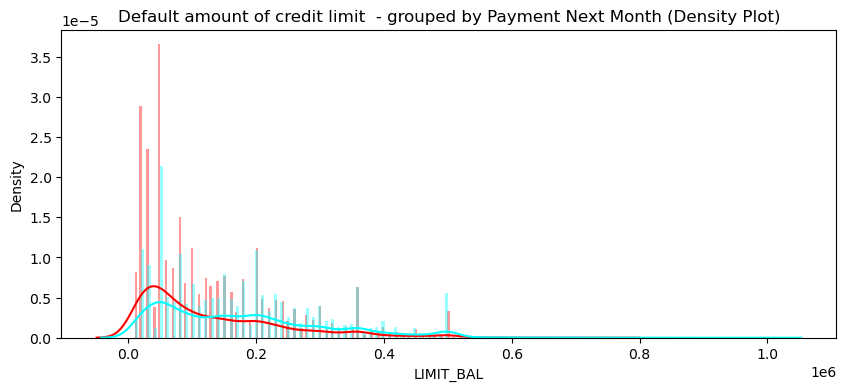

In [51]:
class_0 = data_credit_card.loc[data_credit_card['def_pay'] == 0]["LIMIT_BAL"]
class_1 = data_credit_card.loc[data_credit_card['def_pay'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (10,4))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color= "red")
sns.distplot(class_0,kde=True,bins=200, color= "cyan")
plt.show()

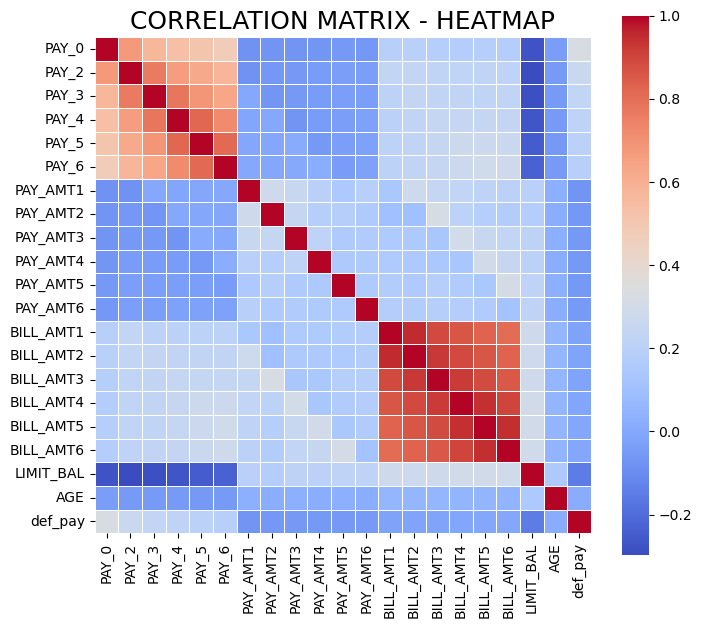

In [52]:
subset2 = data_credit_card[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'LIMIT_BAL', 'AGE', 'def_pay']]

#  looking at correlations matrix, defined via Pearson function  
corr = subset2.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

C:\Users\aadya_1wk1966\AppData\Local\Temp\ipykernel_16004\1590796628.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others', 5 : 'others', 6 : 'others',  0 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others', 0 : 'others'}}, inplace = True)


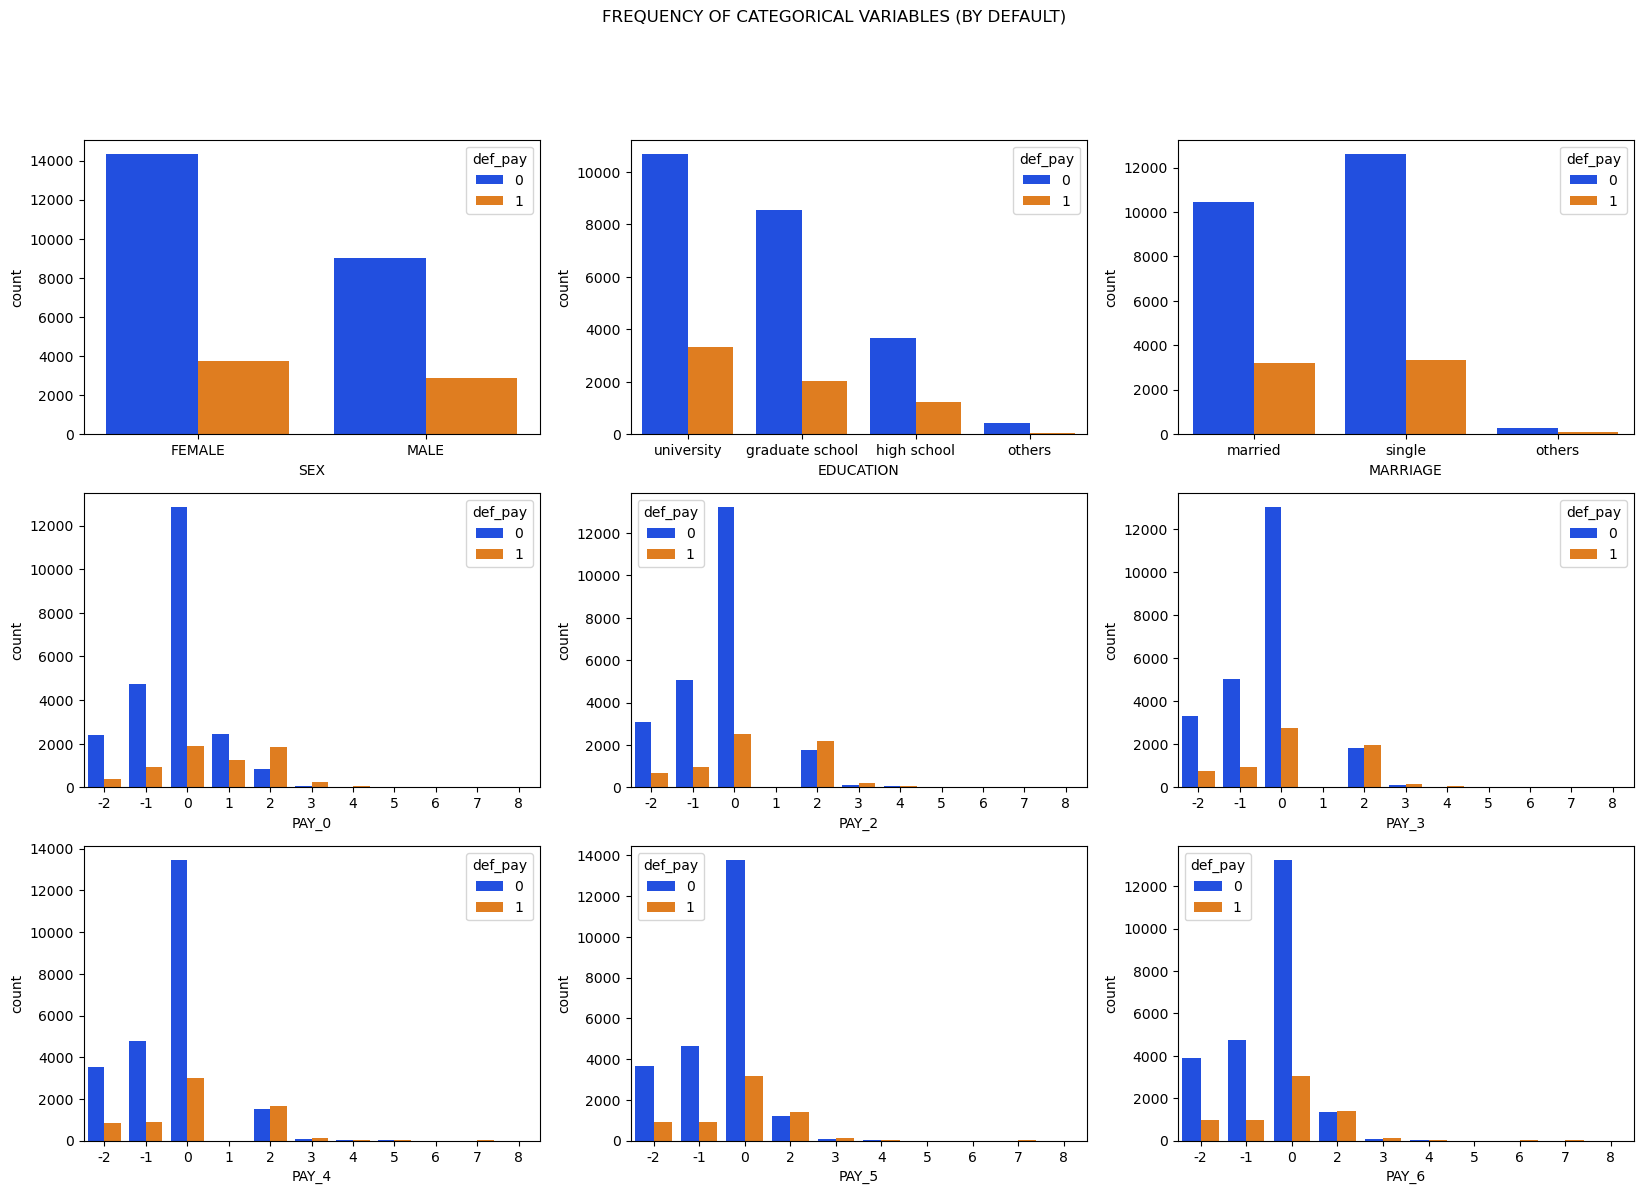

In [53]:
# Creating a new dataframe with categorical variables
subset = data_credit_card[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'def_pay']]
subset.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others', 5 : 'others', 6 : 'others',  0 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others', 0 : 'others'}}, inplace = True)

f, axes = plt.subplots(3, 3, figsize=(20, 13), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY DEFAULT)')
ax1 = sns.countplot(x="SEX", hue="def_pay", data=subset, palette="bright", ax=axes[0,0])
ax2 = sns.countplot(x="EDUCATION", hue="def_pay", data=subset, palette="bright",ax=axes[0,1])
ax3 = sns.countplot(x="MARRIAGE", hue="def_pay", data=subset, palette="bright",ax=axes[0,2])
ax4 = sns.countplot(x="PAY_0", hue="def_pay", data=subset, palette="bright", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_2", hue="def_pay", data=subset, palette="bright", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_3", hue="def_pay", data=subset, palette="bright", ax=axes[1,2])
ax7 = sns.countplot(x="PAY_4", hue="def_pay", data=subset, palette="bright", ax=axes[2,0])
ax8 = sns.countplot(x="PAY_5", hue="def_pay", data=subset, palette="bright", ax=axes[2,1])
ax9 = sns.countplot(x="PAY_6", hue="def_pay", data=subset, palette="bright", ax=axes[2,2]);